# Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Environment

In [6]:
grid_size = 9
start_state = (0, 0)  
goal_state = (8, 8)
obstacles = [(1, 3), (2, 3), (3, 3), (3, 2), (3, 1),
             (5, 5), (6, 5), (7, 5), (8, 5), (5, 6), (5, 7), (5, 8)]
in_portal = (2, 2)
out_portal = (6, 6)
actions = [(1, 0), (-1, 0), (0, -1), (0, 1)]  
gamma = 0.9 

# Define possible states

In [7]:
def is_valid_state(s):
    return 0 <= s[0] < grid_size and 0 <= s[1] < grid_size and s not in obstacles

def get_next_state(s, a):
    next_state = (s[0] + a[0], s[1] + a[1])
    if not is_valid_state(next_state):
        return s
    if next_state == in_portal:
        return out_portal
    if next_state == out_portal:
        return out_portal
    return next_state

# Value Iterations

In [13]:
def value_iteration():
    V = np.zeros((grid_size, grid_size))
    policy = np.zeros((grid_size, grid_size, 2), dtype=int)
    while True:
        delta = 0
        for i in range(grid_size):
            for j in range(grid_size):
                s = (i, j)
                if s == goal_state or s in obstacles:
                    continue
                v = V[i, j]
                Q = np.zeros(len(actions))
                for a_idx, a in enumerate(actions):
                    next_state = get_next_state(s, a)
                    reward = 1 if next_state == goal_state else 0
                    Q[a_idx] = reward + gamma * V[next_state[0], next_state[1]]
                V[i, j] = np.max(Q)
                policy[i, j] = actions[np.argmax(Q)]
                delta = max(delta, abs(v - V[i, j]))
        if delta < 1e-4:
            break
    return policy, V

# Policy Iterations

In [14]:
def policy_iteration():
    policy = np.zeros((grid_size, grid_size, 2), dtype=int)
    V = np.zeros((grid_size, grid_size))
    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for i in range(grid_size):
                for j in range(grid_size):
                    s = (i, j)
                    if s == goal_state or s in obstacles:
                        continue
                    a = tuple(policy[i, j])
                    next_state = get_next_state(s, a)
                    reward = 1 if next_state == goal_state else 0
                    v = V[i, j]
                    V[i, j] = reward + gamma * V[next_state[0], next_state[1]]
                    delta = max(delta, abs(v - V[i, j]))
            if delta < 1e-4:
                break

        # Policy Improvement
        policy_stable = True
        for i in range(grid_size):
            for j in range(grid_size):
                s = (i, j)
                if s == goal_state or s in obstacles:
                    continue
                old_action = tuple(policy[i, j])
                Q = np.zeros(len(actions))
                for a_idx, a in enumerate(actions):
                    next_state = get_next_state(s, a)
                    reward = 1 if next_state == goal_state else 0
                    Q[a_idx] = reward + gamma * V[next_state[0], next_state[1]]
                new_action = actions[np.argmax(Q)]
                policy[i, j] = new_action
                if old_action != new_action:
                    policy_stable = False
        if policy_stable:
            break
    return policy, V

# Define plotting function 

In [39]:
def plot_policy(policy, title):
    plt.figure(figsize=(10, 10))
    grid_size = policy.shape[0]

    X, Y = np.meshgrid(np.arange(grid_size), np.arange(grid_size))
    U = np.zeros_like(X, dtype=float)
    V = np.zeros_like(Y, dtype=float)

    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) == goal_state or (i, j) in obstacles or (i, j) == in_portal:
                continue
            action = policy[i, j]
            U[i, j] = action[1] 
            V[i, j] = action[0] 

    for x in range(grid_size + 1):
        plt.axhline(x - 0.5, color='black', linewidth=1.5)
    for y in range(grid_size + 1):
        plt.axvline(y - 0.5, color='black', linewidth=1.5)

    plt.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color='blue', headlength=4, headwidth=2, headaxislength=3)

    plt.xlim(-0.5, grid_size - 0.5)
    plt.ylim(-0.5, grid_size - 0.5)
    plt.grid(False)  
    plt.title(title, fontsize=16, fontweight='bold')
    plt.gca().set_aspect('equal', adjustable='box')

    plt.plot(goal_state[1], goal_state[0], 'r*', markersize=20, label='Goal') 
    plt.text(goal_state[1], goal_state[0], 'Goal', fontsize=14, ha='center', va='center', color='red')

    plt.plot(start_state[1], start_state[0], 'go', markersize=15, label='Start') 
    plt.text(start_state[1], start_state[0], 'Start', fontsize=14, ha='center', va='center', color='green')

    plt.plot(in_portal[1], in_portal[0], 'bs', markersize=10, label='IN Portal')  
    plt.text(in_portal[1], in_portal[0], 'IN', fontsize=12, ha='center', va='center', color='white')
    plt.plot(out_portal[1], out_portal[0], 'bs', markersize=10, label='OUT Portal') 
    plt.text(out_portal[1], out_portal[0], 'OUT', fontsize=12, ha='center', va='center', color='white')

    plt.legend(loc='best')

    for obs in obstacles:
        plt.plot(obs[1], obs[0], markersize=15, label='Obstacle')
        plt.text(obs[1], obs[0], 'Obstacle', fontsize=10, ha='center', va='center', color='black')

    plt.show()


## Visualize the optimal policy for Value Iteration by plotting a quiver plot

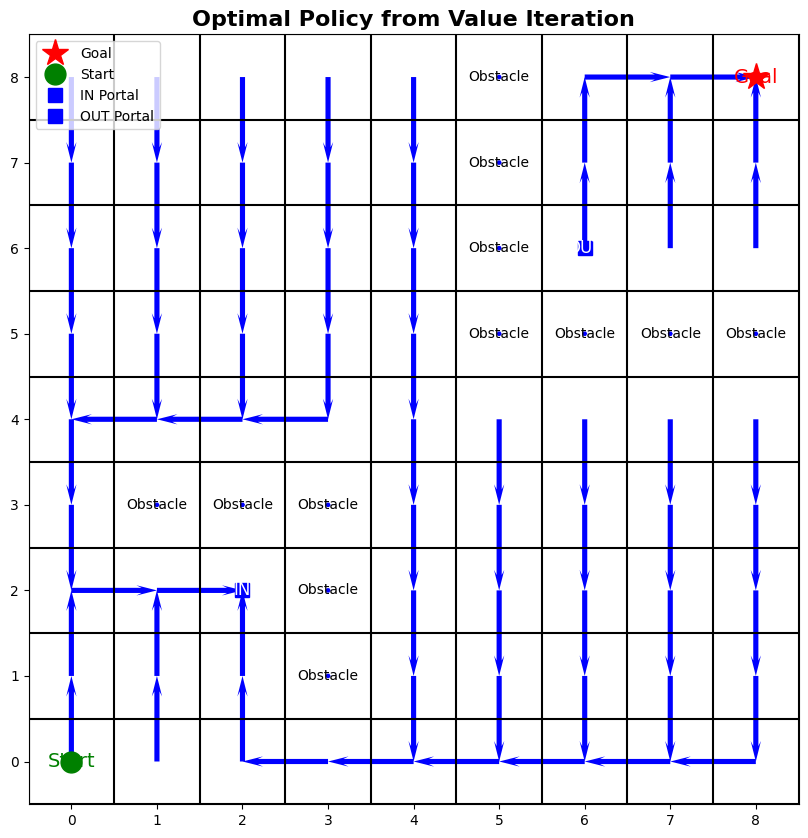

In [41]:
value_itr_policy, _ = value_iteration()
plot_policy(value_itr_policy, "Optimal Policy from Value Iteration")

## Visualize the optimal policy for Policy Iteration by plotting a quiver plot

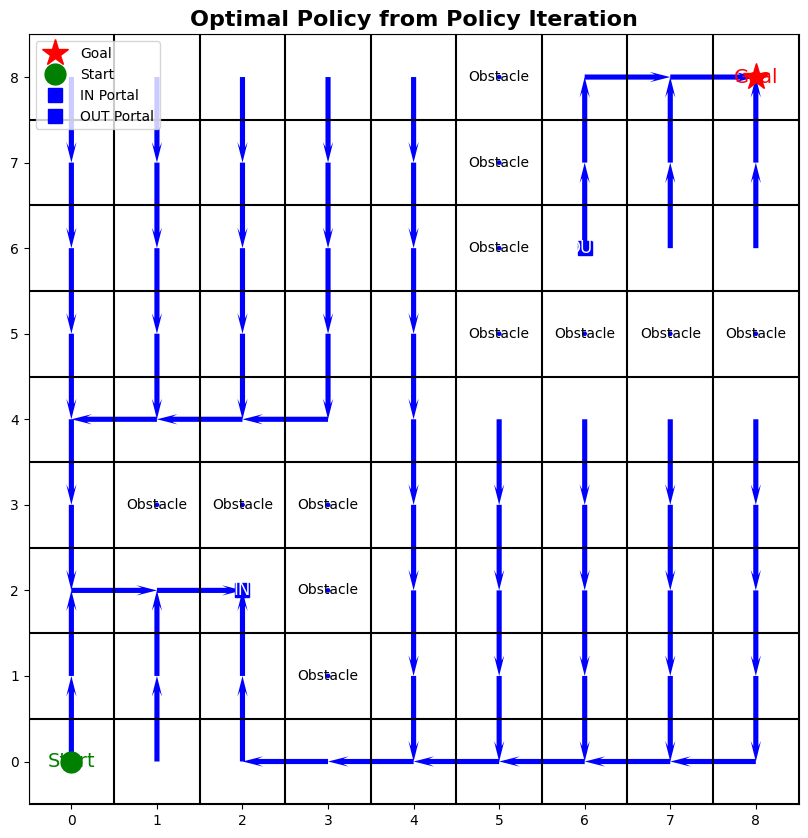

In [42]:
policy_itr_policy, _ = policy_iteration()
plot_policy(policy_itr_policy, "Optimal Policy from Policy Iteration")